In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def jaccard(first, second):
    return len(set(first).intersection(second)) / len(set(first).union(second)), len(set(first).intersection(second)) 

In [3]:
data_dict = pd.read_csv('D:/project/PY010_table_01.csv', header=None, index_col=0, squeeze=True).to_dict()
gene = list(data_dict.values())[1::]
name = list(data_dict.keys())[1::]



In [36]:
coef = []
name_node = []
for x in range(0,len(name[:-1000])):
    loc =[]
    for y in range(0,len(name[:-1000])):
        if jaccard(gene[x], gene[y]) >= 0.8  :
            loc.append(name[y])
    coef.append(loc)
    name_node.append(name[x])
    


KeyboardInterrupt: 

In [19]:
coef = []
name_node = []
similarity =[]
list_gene = []
num = []
g_sample =[]
list_gene = []
for x in range(0,5000):
    list_gene = []
    num = []
    coef =[]
    for y in  range(0,5000):
        if jaccard(gene[x].strip('}{').split(', '),gene[y].strip('}{').split(', '))[0] >= 0.8  :
            similarity.append(jaccard(gene[x].strip('}{').split(', '),gene[y].strip('}{').split(', '))[0])
            num.append(len(set(gene[x].strip('}{').split(', ')).intersection(set(gene[y].strip('}{').split(', ')))))
            list_gene.append(set(gene[x].strip('}{').split(', ')).intersection(set(gene[y].strip('}{').split(', '))))
            coef.append(name[y])
    g_sample.append(coef)
    name_node.append(name[x])

        
g_sample

[['CPC001_HA1E_24H_BRD-A19500257_10.0'],
 ['CPC001_HA1E_24H_BRD-A82329351_10.0',
  'CPC001_VCAP_6H_BRD-K56699285_10.0',
  'CPC002_HA1E_6H_BRD-K24675965_10.0',
  'CPC002_HCC515_6H_BRD-K25433859_10.0'],
 ['CPC001_HA1E_24H_BRD-K02607075_10.0'],
 ['CPC001_HA1E_24H_BRD-A49906757_10.0'],
 ['CPC001_HA1E_24H_BRD-K85242180_10.0',
  'CPC001_HA1E_24H_BRD-A66927094_10.0',
  'CPC001_HA1E_6H_BRD-K05906022_10.0',
  'CPC001_HA1E_6H_BRD-A32164164_10.0',
  'CPC001_VCAP_6H_BRD-K96670504_10.0',
  'CPC002_HCC515_6H_BRD-K18905250_10.0'],
 ['CPC001_HA1E_24H_BRD-K78844995_10.0'],
 ['CPC001_HA1E_24H_BRD-A45140972_10.0'],
 ['CPC001_HA1E_24H_BRD-K63938928_10.0',
  'CPC001_HA1E_24H_BRD-A44133049_10.0',
  'CPC001_HA1E_24H_BRD-A15530910_10.0',
  'CPC001_HA1E_24H_BRD-K79145749_10.0',
  'CPC001_HA1E_24H_BRD-K48970916_10.0',
  'CPC001_HA1E_6H_BRD-K60184833_10.0',
  'CPC001_HA1E_6H_BRD-K89923877_10.0',
  'CPC001_HCC515_24H_BRD-A63667919_10.0',
  'CPC001_HCC515_24H_BRD-K94689771_10.0',
  'CPC001_HCC515_24H_BRD-K24201553

In [23]:
xx = gene[1].strip('}{').split(', ')
len(set(xx).intersection(xx)) 
df_new = pd.DataFrame(g_sample)
df_new['name_node'] = name_node
df_new['similarity'] = similarity
df_new['number /of intersection'] = num
df_new['same gene'] = list_gene

df_new
#df_new.to_csv('map_gene_010_without_threshold.csv')

ValueError: Length of values does not match length of index

In [20]:

#df = pd.DataFrame(list(range(0, len(coef))), columns=['name'])
df = pd.DataFrame(name_node, columns=['name'])
df['coef'] = g_sample
df

df['name'] = df['name'].astype('object')
df['coef'] = df['coef'].astype('object')

new_df = df[df.coef.apply(lambda c: c!=[])]
names = ['name']
idx = pd.MultiIndex.from_tuples(df[names].values.tolist(), names=names)
xx = pd.DataFrame(df.coef.tolist(), idx).stack().reset_index(names, name='coef')

G = nx.convert_matrix.from_pandas_edgelist(xx, source= 'name' , target='coef')
G.name = 'My Networking'
print(nx.info(G))



Name: My Networking
Type: Graph
Number of nodes: 5000
Number of edges: 743786
Average degree: 297.5144


In [25]:
new_df

name  \
0     CPC001_HA1E_24H_BRD-A19500257_10.0   
1     CPC001_HA1E_24H_BRD-A82329351_10.0   
2     CPC001_HA1E_24H_BRD-K02607075_10.0   
3     CPC001_HA1E_24H_BRD-A49906757_10.0   
4     CPC001_HA1E_24H_BRD-K85242180_10.0   
...                                  ...   
4995    CPC002_PC3_6H_BRD-A69960130_10.0   
4996    CPC002_PC3_6H_BRD-K54330070_10.0   
4997    CPC002_PC3_6H_BRD-K37289225_10.0   
4998    CPC002_PC3_6H_BRD-A35623999_10.0   
4999    CPC002_PC3_6H_BRD-K01292756_10.0   

                                                   coef  
0                  [CPC001_HA1E_24H_BRD-A19500257_10.0]  
1     [CPC001_HA1E_24H_BRD-A82329351_10.0, CPC001_VC...  
2                  [CPC001_HA1E_24H_BRD-K02607075_10.0]  
3                  [CPC001_HA1E_24H_BRD-A49906757_10.0]  
4     [CPC001_HA1E_24H_BRD-K85242180_10.0, CPC001_HA...  
...                                                 ...  
4995  [CPC001_HA1E_6H_BRD-K85318537_10.0, CPC001_PC3...  
4996  [CPC001_HA1E_24H_BRD-K62609077_10.0, CPC001_HA...  
4997  [CPC001_HCC515_6H_BRD-A03359064_10.0, CPC002_P...  
4998  [CPC001_HA1E_24H_BRD-K62609077_10.0, CPC001_HA...  
4999  [CPC001_HA1E_24H_BRD-K62609077_10.0, CPC001_HA...  

[5000 rows x 2 columns]

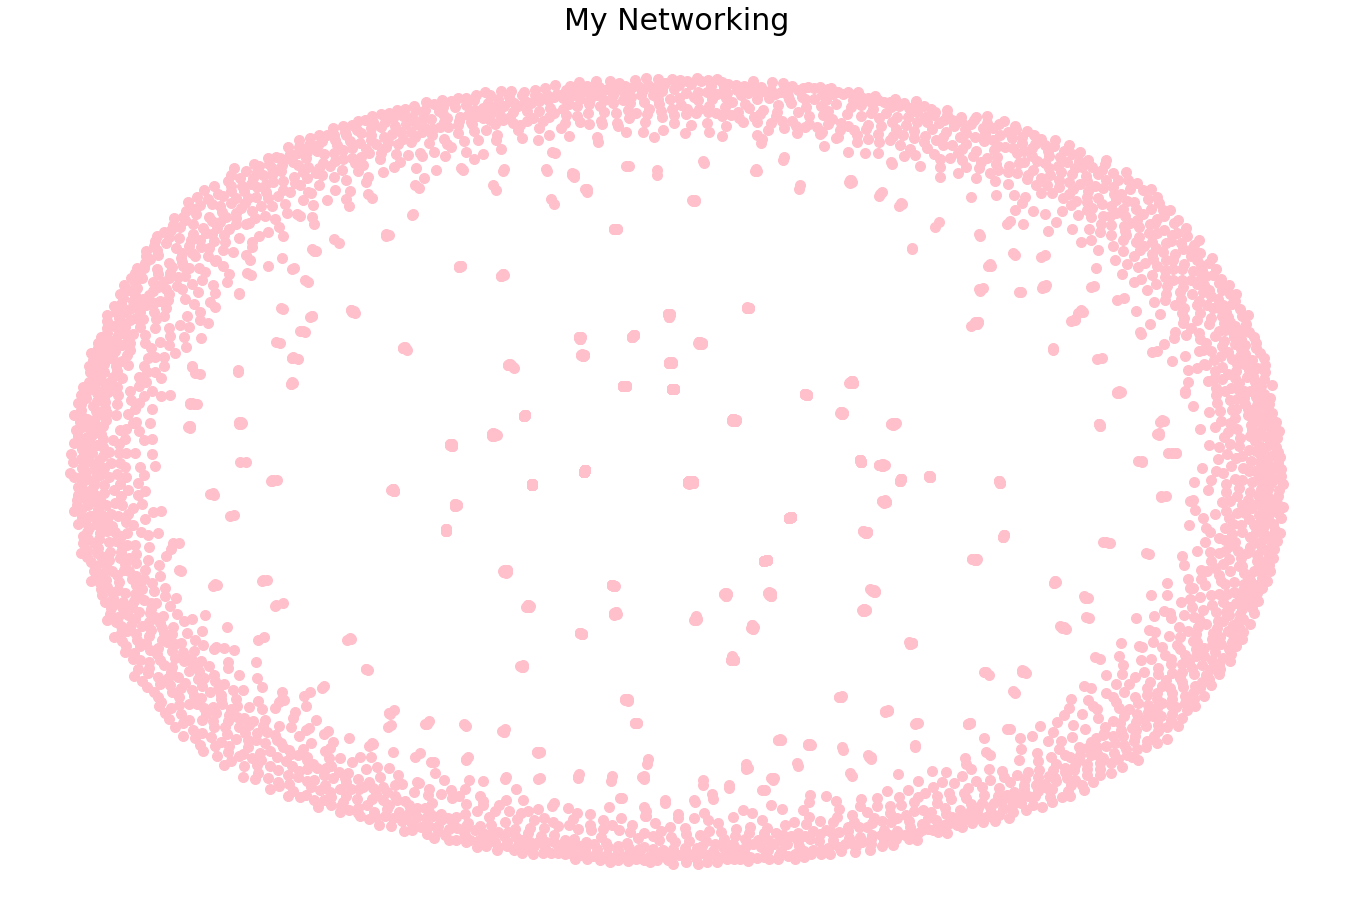

In [21]:
plt.figure(figsize=(24,16))
my_var2 = nx.draw_networkx(G, 
                 nx.spring_layout(G), 
                 with_labels=False, 
                 font_weight='normal', 
                 node_size=100,
                 arrows=True,
                 node_color='pink',
                 font_color='blue',
                 edge_color='blue')
plt.title(G.name, size=30)
plt.axis('off')
plt.show()

In [28]:
def graph_drawing(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=100, 
                     with_labels=False,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()

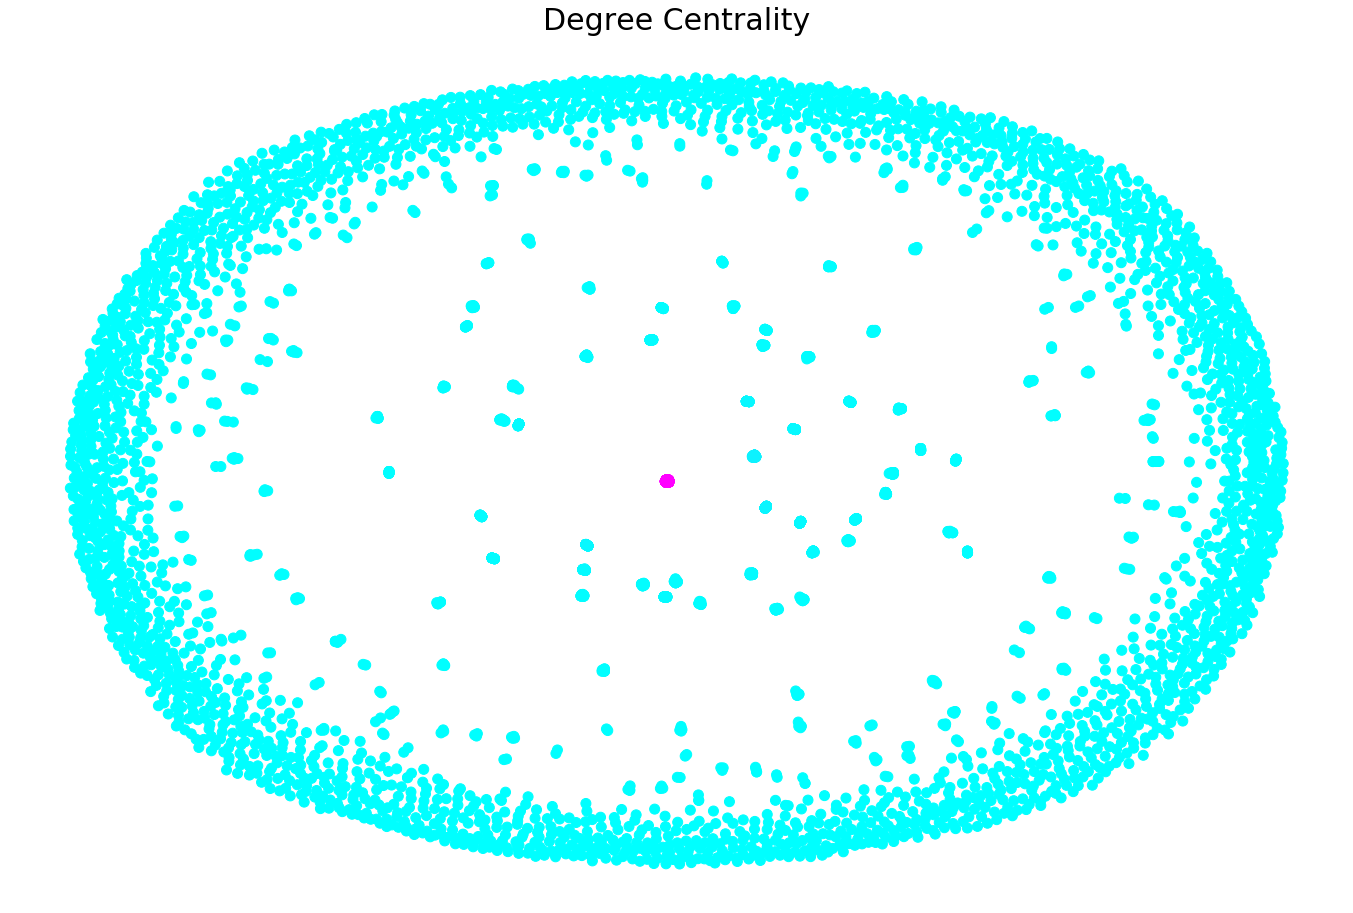

In [29]:
my_var1 = graph_drawing(G, nx.spring_layout(G), nx.degree_centrality(G), 'Degree Centrality')

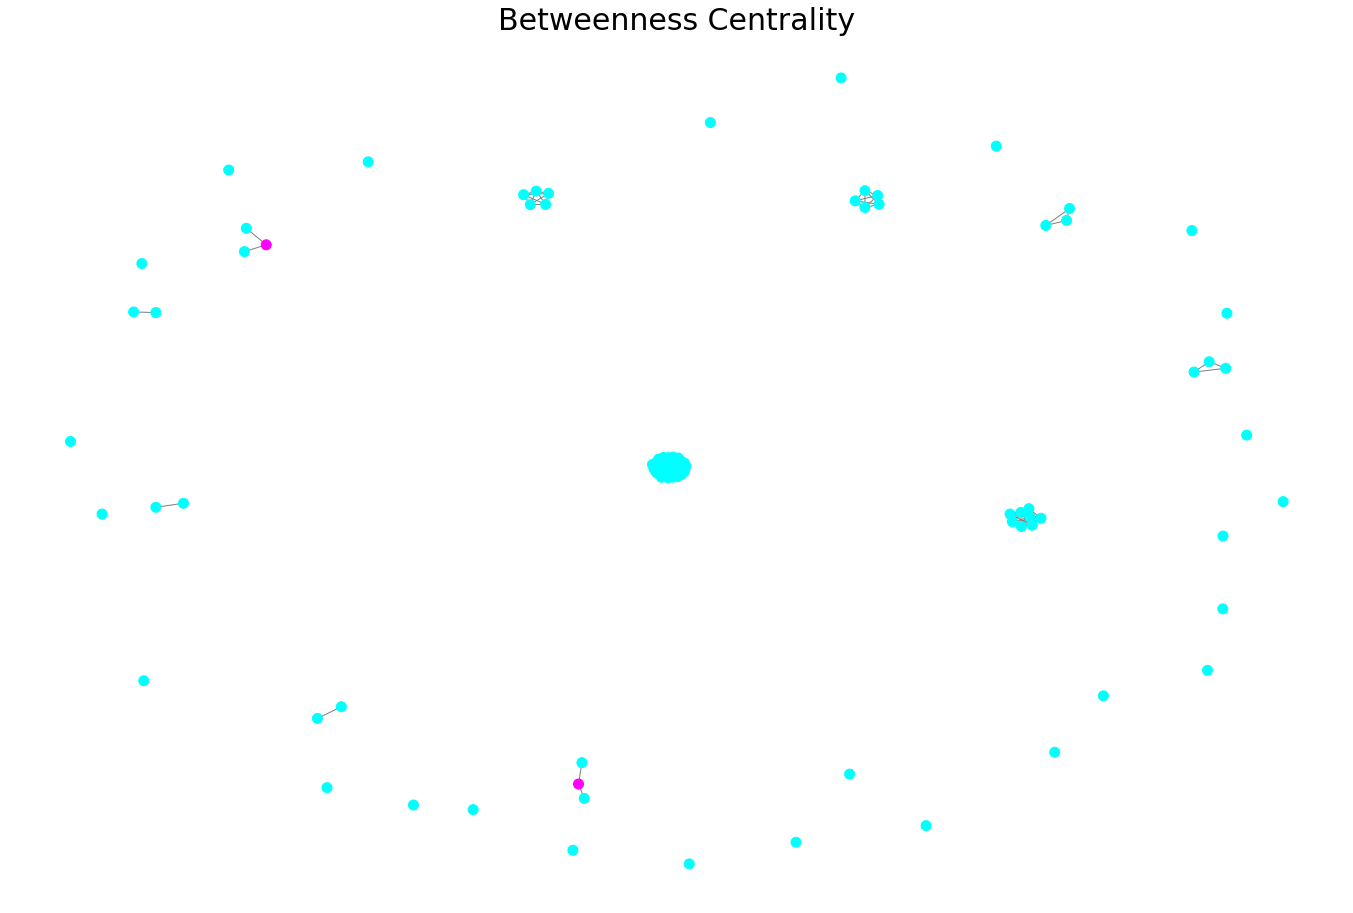

In [20]:
graph_drawing(G, nx.spring_layout(G), nx.betweenness_centrality(G), 'Betweenness Centrality')

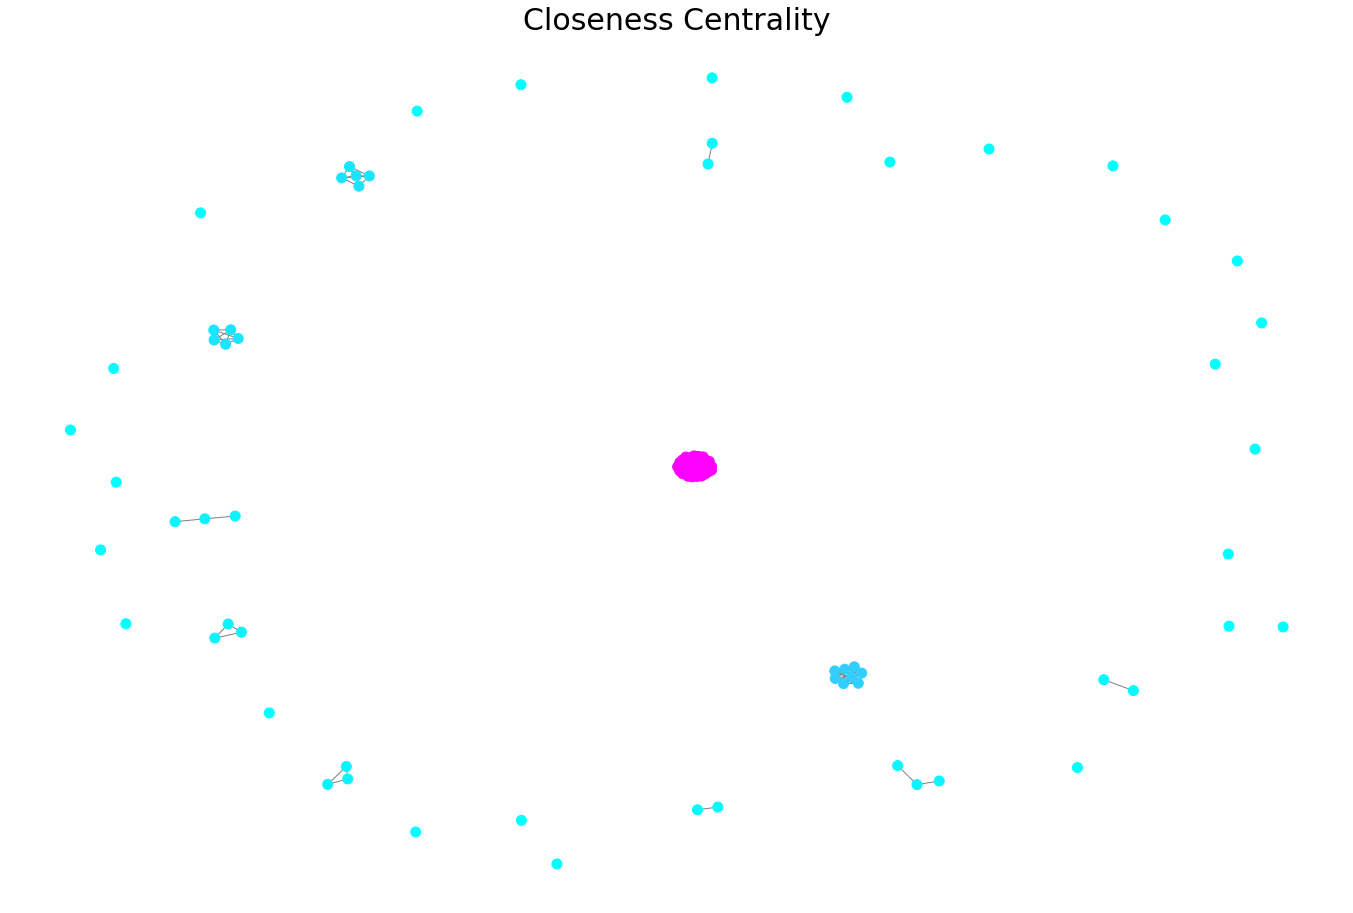

In [21]:
graph_drawing(G, nx.spring_layout(G), nx.closeness_centrality(G), 'Closeness Centrality')

In [41]:
from pyvis.network import Network


In [42]:
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()

sources = xx['name'].astype(str)
targets = xx['coef'].astype(str)


edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]


    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=1)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("my_network.html")


KeyboardInterrupt: 